# Sports Dataset

10,000 random photos from soccer matches captured at a single timestamp make up the dataset. Every snapshot has a number of elements that offer details on the current match. The objective of the dataset is to capture the evolving dynamics of a soccer game, and to make predictions for the number of goals that will be scored for the remaining playing time.

# Dataset Structure

The dataset is presented in a single file with 10,000 rows and 20 columns, each row representing a snapshot of a soccer match, and each column representing a specific attribute or feature of that snapshot.

Number of Instances (Rows): 10,000 instances 
Number of Features (Columns): 20 features/columns 

# Feature Representation

The features include identifiers such as uuid, and dynamic match-related details such as the current minute of play, home and away team scores, yellow and red cards for both teams, the number of attacks and dangerous attacks by each team, corners awarded, shots on and off target for both teams, and the ball possession percentage for both the home and away teams until the current minute.

# Libraries

- pandas
- numpy
- matplotlib
- pickle
- os
- sklearn
- pytorch
- scipy

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import seaborn as sns
import torch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [163]:
try:df = pd.read_csv(filepath_or_buffer = 'sports.csv', header = 0)
except:df = pd.read_csv(filepath_or_buffer = 'Dataset 3 - Sports Dataset/sports.csv', header = 0)
df

uuid  current_minute  home_score  \
0     2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742              94           1   
1     869c1420-9153-4d73-8d79-5db31a8a80a4              91           2   
2     549e25a3-4c93-459d-b115-fb303273c78a               3           0   
3     287b4be5-9163-4e2e-895d-d11052a97410              17           0   
4     a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8              76           1   
...                                    ...             ...         ...   
6995  838f35c5-afa3-474b-876e-063fd49d4326              32           0   
6996  4bcfd248-5f39-4af2-b465-5358c9e7088e             101           3   
6997  deccdc2c-625e-495a-9b06-02d540d4cd24              78           1   
6998  94a20308-55d8-47cb-8f8b-d2702a531c74              72           2   
6999  0362876c-00dc-428f-a278-303d175a6ad2               8           0   

      away_score  home_yellow_cards  away_yellow_cards  home_red_cards  \
0              2                  0                  0               0   
1              0                  0                  0               0   
2              0                  0                  0               0   
3              0                  1                  0               0   
4              0                  1                  0               0   
...          ...                ...                ...             ...   
6995           0                  0                  0               0   
6996           0                  0                  1               0   
6997           0                  0                  0               0   
6998           0                  0                  0               0   
6999           0                  0                  0               0   

      away_red_cards  home_attacks  away_attacks  ...  away_dangerous_attacks  \
0                  0            39            45  ...                      26   
1                  0             0             0  ...                       0   
2                  0             3             1  ...                       0   
3                  0            41            46  ...                      25   
4                  0            69            78  ...                      46   
...              ...           ...           ...  ...                     ...   
6995               0            16            25  ...                      13   
6996               0             0             0  ...                       0   
6997               0            71            60  ...                      40   
6998               0            85            66  ...                      20   
6999               0             6            14  ...                       3   

      home_corners  away_corners  home_off_target  away_off_target  \
0                4             1                4                0   
1                0             0                0                0   
2                0             0                0                0   
3                1             0                0                2   
4                1             1                0                3   
...            ...           ...              ...              ...   
6995             0             1                1                2   
6996             0             0                0                0   
6997             7             0                5                5   
6998             3             0                4                1   
6999             0             0                0                0   

      home_on_target  away_on_target  home_possession  away_possession  \
0                  4               6               48               52   
1                  0               0               50               50   
2                  0               0               62               38   
3                  0               0               55               45   
4                  4               4               45               55   
..

# Data Preprocessing
Our objective for this project is to use the data given in the dataset to predict whether 1 or more goals can be scored in the remaining playing time of the match.

Remove Missing Data

In [4]:
df.dropna(inplace=True)

UUID is an unique identifier. no need to keep it.

In [5]:
try:
    df = df.drop(['uuid'], axis=1)
except:
    print('no uuid')

Use only data taken within the game time. Games last 105 minutes.  
Then remove any data from halftime. Halftime should be around minute 45 to minute 60. Because of that, starting minute 60, subtract them by 15 to make data contiguous.

In [6]:
df = df.query('0<= current_minute <= 105 ')
df = df.query('not (44 < current_minute <60)')
df['current_minute'] = df['current_minute'].apply(lambda x: x-15 if x > 45 else x)

<!-- df = df.groupby(df['current_minute'],as_index = False).aggregate('sum')
Aggregating was temptying but the samples became to small to use 
Feature Scaling
numerical_features = ['current_minute', 'home_score', 'away_score', 'home_yellow_cards', 'away_yellow_cards',
                      'home_red_cards', 'away_red_cards', 'home_attacks', 'away_attacks', 'home_dangerous_attacks',
                      'away_dangerous_attacks', 'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
                      'home_on_target', 'away_on_target', 'home_possession', 'away_possession'] -->

In [7]:
# the target variable indicates whether 1 goal or more will be scored with the remaining time of the match. it shows binary values
df['target']= 0
df.loc[df['home_score'] + df['away_score']>0,'target'] = 1

X = df.drop(['target','home_score','away_score'], axis=1)
y = df['target']


In [8]:
# Current shape of our X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (6577, 18)
Shape of y: (6577,)


# Exploratory Data Analysis

This is the content of the dataset

In [9]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


current_minute  home_score  away_score  home_yellow_cards  \
0              79           1           2                  0   
1              76           2           0                  0   
2               3           0           0                  0   
3              17           0           0                  1   
4              61           1           0                  1   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                  0               0               0            39   
1                  0               0               0             0   
2                  0               0               0             3   
3                  0               0               0            41   
4                  0               0               0            69   

   away_attacks  home_dangerous_attacks  ...  home_corners  away_corners  \
0            45                      29  ...             4             1   
1             0                       0  ...             0             0   
2             1                       1  ...             0             0   
3            46                      11  ...             1             0   
4            78                      21  ...             1             1   

   home_off_target  away_off_target  home_on_target  away_on_target  \
0                4                0               4               6   
1                0                0               0               0   
2                0                0               0               0   
3                0                2               0               0   
4                0                3               4               4   

   home_possession  away_possession  final_delta  target  
0               48               52            1       1  
1               50               50            1       1  
2               62               38            4       0  
3               55               45            2       0  
4               45               55            0       1  

[5 rows x 21 columns]

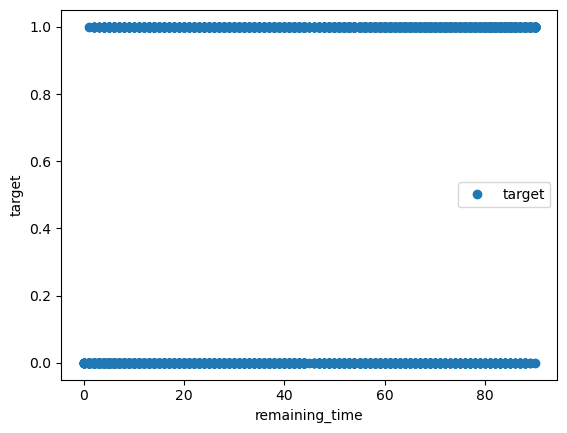

In [10]:
df.plot(x='current_minute', y='target', style='o')
plt.xlabel('remaining_time')
plt.ylabel('target')
plt.show()

Basic summary statistics for numerical values.  
Chart above shows that some snapshots had goals. Others had none. The data given does not have enough resolution to resolve when goals were made.

In [11]:
print("\nSummary statistics of numerical features:")
df.describe()


Summary statistics of numerical features:


current_minute   home_score   away_score  home_yellow_cards  \
count     6577.000000  6577.000000  6577.000000        6577.000000   
mean        49.804926     0.783032     0.608332           0.510263   
std         26.441958     1.068046     0.911459           0.907488   
min          0.000000     0.000000     0.000000           0.000000   
25%         27.000000     0.000000     0.000000           0.000000   
50%         55.000000     0.000000     0.000000           0.000000   
75%         72.000000     1.000000     1.000000           1.000000   
max         90.000000     8.000000     9.000000           8.000000   

       away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
count        6577.000000     6577.000000     6577.000000   6577.000000   
mean            0.592215        0.008515        0.014900     45.755968   
std             1.007297        0.093528        0.122412     36.029737   
min             0.000000        0.000000        0.000000      0.000000   
25%             0.000000        0.000000        0.000000     14.000000   
50%             0.000000        0.000000        0.000000     42.000000   
75%             1.000000        0.000000        0.000000     71.000000   
max             8.000000        2.000000        2.000000    255.000000   

       away_attacks  home_dangerous_attacks  ...  home_corners  away_corners  \
count   6577.000000             6577.000000  ...    6577.00000   6577.000000   
mean      42.857686               27.212863  ...       2.33161      1.971111   
std       33.539557               22.968335  ...       2.44227      2.192337   
min        0.000000                0.000000  ...       0.00000      0.000000   
25%       13.000000                7.000000  ...       0.00000      0.000000   
50%       40.000000               24.000000  ...       2.00000      1.000000   
75%       67.000000               42.000000  ...       4.00000      3.000000   
max      183.000000              132.000000  ...      14.00000     18.000000   

       home_off_target  away_off_target  home_on_target  away_on_target  \
count      6577.000000      6577.000000     6577.000000     6577.000000   
mean          3.016573         2.551163        2.136688        1.759313   
std           3.138122         2.719920        2.316965        2.002735   
min           0.000000         0.000000        0.000000        0.000000   
25%           0.000000         0.000000        0.000000        0.000000   
50%           2.000000         2.000000        2.000000        1.000000   
75%           5.000000         4.000000        3.000000        3.000000   
max          24.000000        18.000000       22.000000       19.000000   

       home_possession  away_possession  final_delta       target  
count      6577.000000      6577.000000  6577.000000  6577.000000  
mean         51.581572        48.415235     1.427855     0.649536  
std          10.542929        10.544736     1.423859     0.477151  
min           0.000000         0.000000    -2.000000     0.000000  
25%          46.000000        42.000000     0.000000     0.000000  
50%          51.000000        49.000000     1.000000     1.000000  
75%          58.000000        54.000000     2.000000     1.000000  
max         100.000000       100.000000    10.000000     1.000000  

[8 rows x 21 columns]

Scatterplot matrix for pairs of numerical features


Pairplot for numerical features:


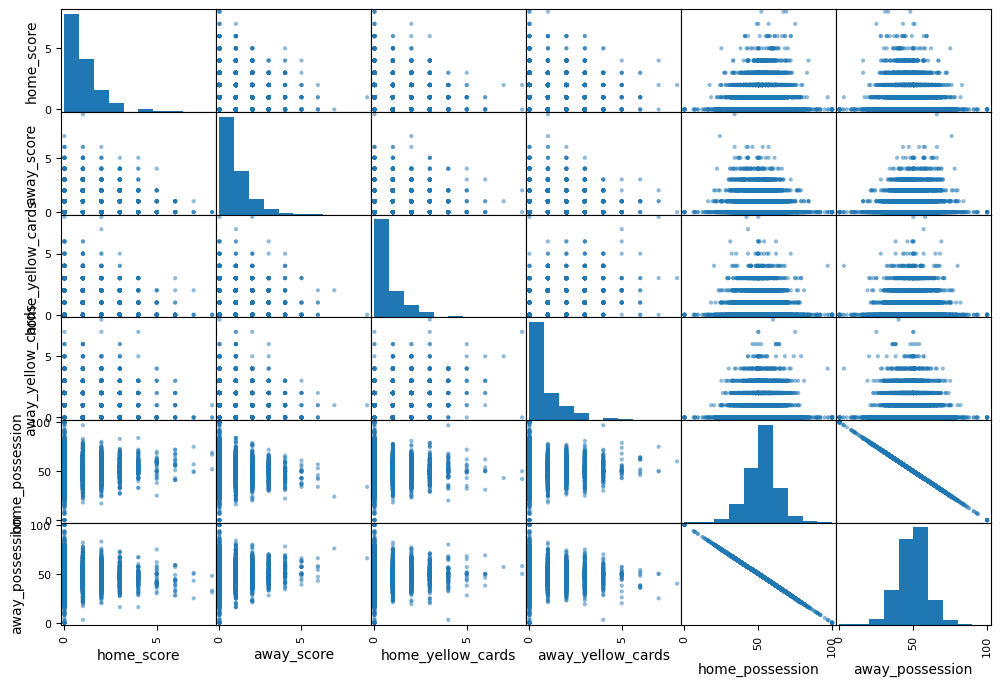

In [12]:
print("\nPairplot for numerical features:")
scatter_matrix = pd.plotting.scatter_matrix(df[['home_score', 'away_score', 'home_yellow_cards', 'away_yellow_cards', 'home_possession', 'away_possession']], figsize=(12, 8))
plt.show()

Histogram that shows the distribution of home and away scores


Distribution of home and away scores:


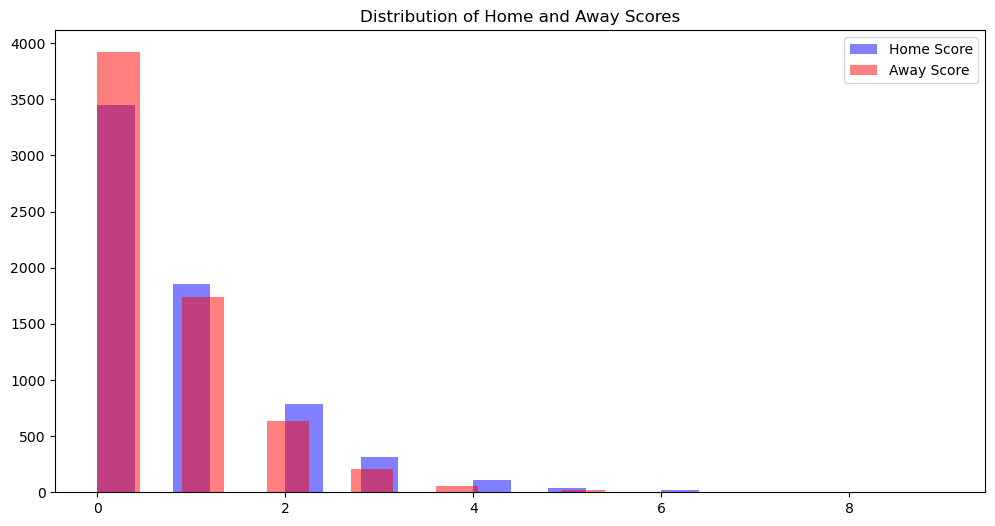

In [13]:
print("\nDistribution of home and away scores:")
plt.figure(figsize=(12, 6))
plt.hist(df['home_score'], bins=20, alpha=0.5, label='Home Score', color='blue')
plt.hist(df['away_score'], bins=20, alpha=0.5, label='Away Score', color='red')
plt.title('Distribution of Home and Away Scores')
plt.legend()
plt.show()

# Data set splitting

In [14]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# split train data to test and validation sets equally
# train data will train the initial  model
# validation will be used to find the best hyper parameters
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Helpers
The cells below contain functions that will help with displaying things later

In [15]:
# predictions: model predictions
# actual: the actual labels
#mode: type of data set evaluated
def show_metrics(true,predictions,mode = "Train"):
    
    accuracy = accuracy_score(true,predictions)
    conf_matrix = confusion_matrix(true,predictions)
    classification_rep = classification_report(true,predictions)
    
    print(f"\n{mode} Accuracy:", accuracy)
    print(f"{mode} Confusion Matrix:\n", conf_matrix)
    print(f"{mode} Classification Report:\n", classification_rep)
    return accuracy, conf_matrix,classification_rep

In [16]:
def show_mat(mat,title = "Confusion Matrix"):
    fig, axes = plt.subplots(1, 1, figsize=(12, 4))
    
    # Confusion Matrix
    sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('True')
    axes.set_title(title)
    
    plt.show()

# Logistic Regression Model
Since this is a classification task, Logistic regression can be applied. Its implementation is rather simple here.

Step 1: Initialize and train the model

In [17]:
logreg = LogisticRegression(n_jobs = -1)
logreg.fit(X_train_1,y_train_1)

LogisticRegression(n_jobs=-1)

Step 2: validate initial model


Train Accuracy: 0.8041825095057035
Train Confusion Matrix:
 [[263 112]
 [ 94 583]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       375
           1       0.84      0.86      0.85       677

    accuracy                           0.80      1052
   macro avg       0.79      0.78      0.78      1052
weighted avg       0.80      0.80      0.80      1052



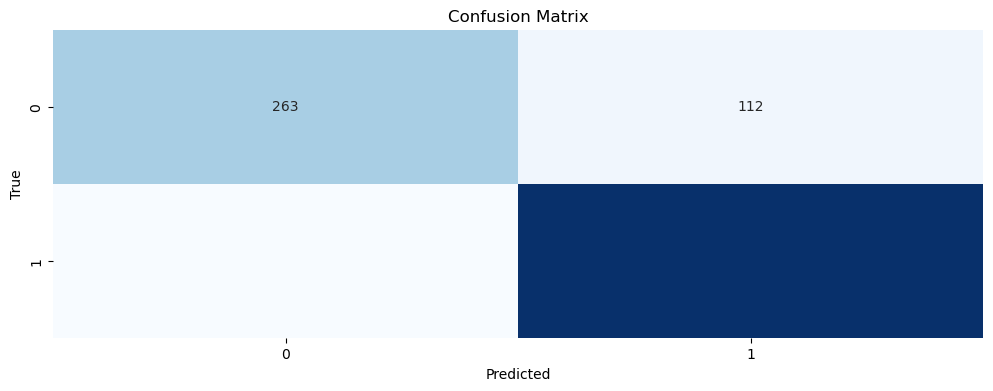

In [18]:
# This is the training 
metrics = show_metrics(y_train_1,logreg.predict(X_train_1))
show_mat(metrics[1])

Based on the class report, the model gives us approximately 80.42% accuracy of predictions for the train set. 

The confusion matrix gives us:
True Positives: 583
True Negatives: 263
False Positives: 112
False Negatives: 94

There is also a decent balance between the recall and precision for predicting whether one or more goals will be scored in the remaining time of a match.


Train Accuracy: 0.7963525835866262
Train Confusion Matrix:
 [[300 137]
 [131 748]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       437
           1       0.85      0.85      0.85       879

    accuracy                           0.80      1316
   macro avg       0.77      0.77      0.77      1316
weighted avg       0.80      0.80      0.80      1316



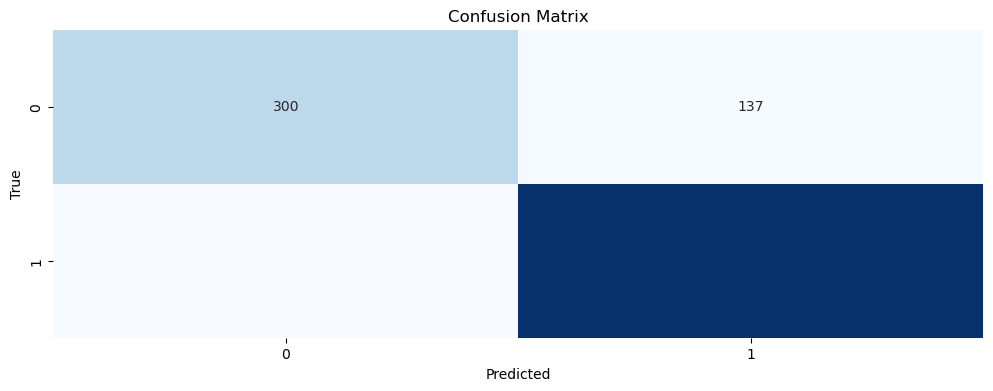

In [19]:
# get test accuracy with a validation set
test_pred = logreg.predict(X_test)
metrics = show_metrics(y_test,test_pred)
show_mat(metrics[1])


The accuracy on the validation set (79.64%) is slightly lower than the accuracy on the training set (80.42%). This model performed slightly lower on new, unseen data on the validation set. 

The confusion matrix gives us:
True Positives: 748
True Negatives: 300
False Positives: 137
False Negatives: 131

The confusion matrices show a similar pattern in terms of True Positives, True Negatives, False Positives, and False Negatives between the training and validation sets. Precision, recall, and F1-score for class (1) are also slightly consistent between the training and validation sets, indicating that the model's performance on predicting one or more goals is similar on both datasets.

Step 3: Find the best hyper parameters for the model

This is the grid of possible hyperparameter values to use. Dropped the solvers that use hessian matrix. Gridsearch practically did not finish. The regularization is only l2 because that is the only regularization function that all the solvers use. It is the default regularization. Regularization term C, tolerance, and the maximum iterations are only limited for demonstration purposes.

In [20]:
hpg = {'solver' : ['lbfgs', 'liblinear',  'sag','saga'],
      'fit_intercept' : [True,False],
       'class_weight' : [None, 'balanced'],
       'max_iter': [i for i in range(100,1000, 100)],
       'C' : [1.0,1.1,1.01,1.001,1.0001,1.00001],
       'tol' : [1e-5,1e-4,1e-3,1e-2,1e-1],
      }

Let the searching commence.

In [21]:
finder = GridSearchCV(logreg,hpg,n_jobs = -1,refit = True,scoring = 'f1',error_score='raise')

In [23]:
finder.fit(X_val, y_val)

GridSearchCV(error_score='raise', estimator=LogisticRegression(n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [1.0, 1.1, 1.01, 1.001, 1.0001, 1.00001],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='f1')

In [24]:
logreg = finder.best_estimator_

To evaluate the model, we will get the training accuracy first. We used the validation set for training since the Training dataset was already used to train the initial model.


Train Accuracy: 0.7823711095272036
Train Confusion Matrix:
 [[ 989  504]
 [ 412 2304]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      1493
           1       0.82      0.85      0.83      2716

    accuracy                           0.78      4209
   macro avg       0.76      0.76      0.76      4209
weighted avg       0.78      0.78      0.78      4209



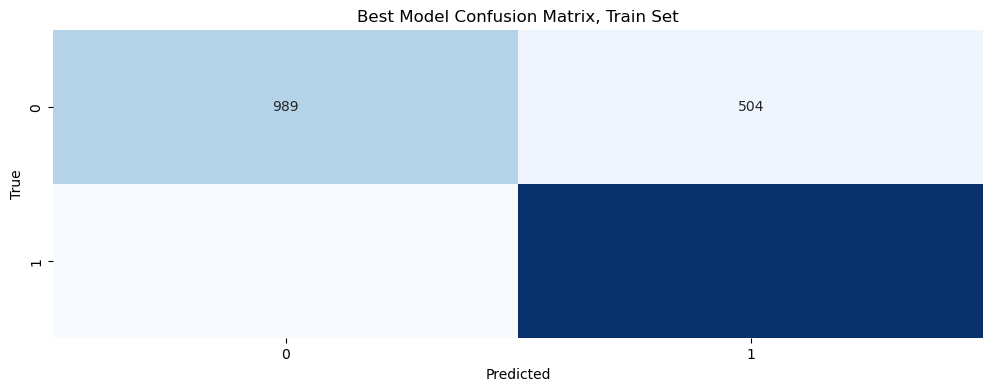

In [25]:
train_predictions = logreg.predict(X_val)
acc, mat, class_rep = show_metrics(y_val,train_predictions,"Train")
show_mat(mat,"Best Model Confusion Matrix, Train Set")

The accuracy slightly decreased after hyperparameter tuning, going from 80.42% to 78.24%. This could be due to the model being more conservative after tuning.

There is a notable increase in both true positives (TP) and true negatives (TN) after hyperparameter tuning. However, false positives (FP) and false negatives (FN) have also increased.

The precision for class 1 remained the same, but recall and f1-score slightly decreased. This indicates that the model is still good at identifying instances of class 1, though there is still a chance that it does not capture some data points.

After evaluating the model on the validation set, we will now evaluate it on the test set to see how well it can predict on its own.

In [26]:
# Make predictions on the test setn
test_predictions = logreg.predict(X_test)


Train Accuracy: 0.7963525835866262
Train Confusion Matrix:
 [[301 136]
 [132 747]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       437
           1       0.85      0.85      0.85       879

    accuracy                           0.80      1316
   macro avg       0.77      0.77      0.77      1316
weighted avg       0.80      0.80      0.80      1316



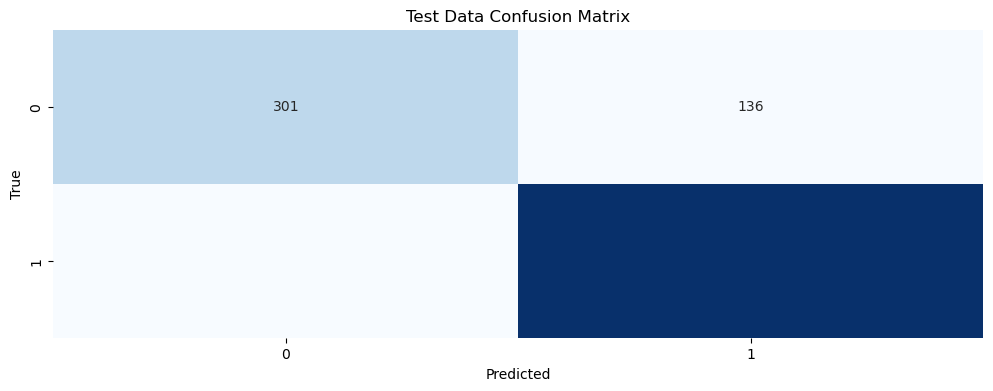

In [27]:
# Evaluate the model on the test set
metrics = show_metrics(y_test,test_predictions)
show_mat(metrics[1], "Test Data Confusion Matrix")

We can see that the accuracy on the test set (79.64%) is very close to the accuracy on the training set (78.24%). This suggests that the model is generalizing well to new, unseen data.

The true positives (TP) and true negatives (TN) on the test set are similar to those on the training set. False positives (FP) and false negatives (FN) also exhibit similar patterns.

The precision, recall, and f1-score for both classes (0 and 1) are consistent between the test and training sets. This indicates that the model's performance is stable across the two datasets.

# Logistic Regression Model Conclusions

After hyperparameter tuning, the test set performance is similar to the training set performance, suggesting that the model generalizes well to the test set. The hyperparameter-tuned model appears to be robust and not overfit to the training data based on the consistency of metrics between the training and test sets.

# Neural Network Model

Next, let's create a neural network model for our predictions.

In [164]:
# preparing data for pytorch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Convert the training, validation, and test data into PyTorch tensors, to enable compatibility with PyTorch neural network models.

In [165]:
# convert data to pytorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

Let's make sure to involve the creation of PyTorch datasets and dataloaders. The following code block utilizes TensorDataset to bundle the input features and target variables into training, validation, and test datasets. Moreover, DataLoader is employed to handle batch processing during model training, validation, and testing.

In [166]:
# create pytorch datasets and dataloaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

Next, let's define a neural network class using PyTorch's nn.Module. The network will consist of two fully connected layers  with a ReLU activation function applied after the first layer.

In [167]:
# defining the neural network
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Initialize the neural network model by instantiating it with the input size corresponding to the number of features in the training data. Also, don't forget to initialize the hyperparameters by setting up the mean squared error loss function and the Adam optimizer with a learning rate of 0.001, to enable the training of the neural network for regression tasks.

In [168]:
# instantiate the model, loss function and optimizer
input_size = X_train.shape[1]
model = RegressionNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Let's train the model! For now, we'll use the hyperparameters: epochs = 50, learning rate = 0.001 and batch size = 32.

In [169]:
# model training
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, targets)

Let's evaluate the model before seeking out the best parameters to use, how well did we do? (Note: since we are using a Neural Network for a regression task, we'll use MSE to measure loss)

In [170]:
# evaluation (training set)
model.eval()
predictions = []
targets_list = []
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = model(inputs)
        predictions.extend(outputs.numpy())
        targets_list.extend(targets.numpy())

test_mse = mean_squared_error(targets_list, predictions)
print(f'Test MSE: {test_mse}')

Test MSE: 0.12549705803394318



Train Accuracy: 0.8122623574144486
Train Confusion Matrix:
 [[ 963  542]
 [ 248 2455]]
Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.64      0.71      1505
         1.0       0.82      0.91      0.86      2703

    accuracy                           0.81      4208
   macro avg       0.81      0.77      0.79      4208
weighted avg       0.81      0.81      0.81      4208



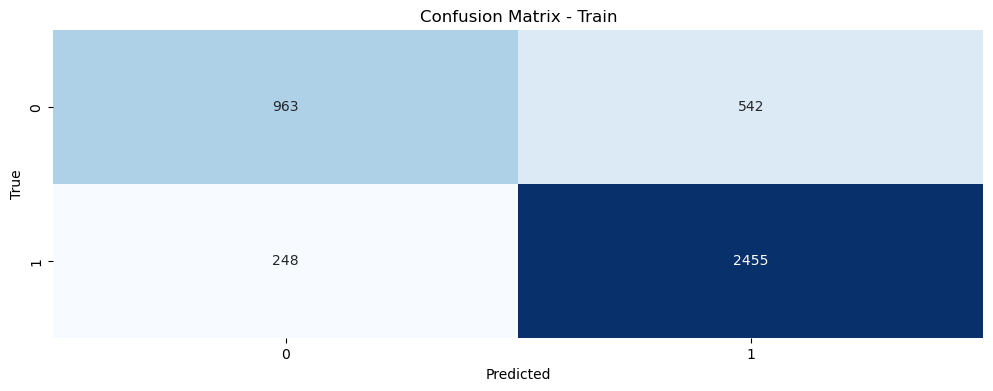

In [171]:
show_metrics(targets_list, np.round(predictions), mode="Train")
conf_matrix_train = confusion_matrix(targets_list, np.round(predictions))
show_mat(conf_matrix_train, title="Confusion Matrix - Train")

To find the best hyperparameters, let's perform manual hyperparameter tuning. The following code iterates through different combinations of learning rates (lr), batch sizes (batch_size), and epochs (epochs). For each combination, it trains the model using the training data and evaluates its performance on the validation set. The best hyperparameters are determined based on the lowest mean squared error (MSE) on the test set, and the corresponding best model is retained.

In [160]:
# hyperparameter tuning
best_mse = float('inf')
best_params = None

for lr in [0.001, 0.01, 0.1]:
    for batch_size in [32, 64]:
        for epochs in [50, 100]:
            model = RegressionNN(X_train.shape[1])
            optimizer = optim.Adam(model.parameters(), lr=lr)
            criterion = nn.MSELoss()

            train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_data, batch_size=batch_size)

            for epoch in range(epochs):
                model.train()
                for inputs, targets in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    loss.backward()
                    optimizer.step()

                model.eval()
                with torch.no_grad():
                    val_loss = 0.0
                    for inputs, targets in val_loader:
                        outputs = model(inputs)
                        val_loss += criterion(outputs, targets)

                val_mse = val_loss / len(val_loader)

            model.eval()
            predictions = []
            targets_list = []
            with torch.no_grad():
                for inputs, targets in DataLoader(test_data, batch_size=batch_size):
                    outputs = model(inputs)
                    predictions.extend(outputs.numpy())
                    targets_list.extend(targets.numpy())

            test_mse = mean_squared_error(targets_list, predictions)
            print(f'LR: {lr}, Batch Size: {batch_size}, Epoch {epochs}, Test MSE: {test_mse}')

            if test_mse < best_mse:
                best_mse = test_mse
                best_params = {'lr': lr, 'batch_size': batch_size, 'epochs': epochs}
                best_model = model

print("Best Hyperparameters:", best_params)

LR: 0.001, Batch Size: 32, Epoch 50, Test MSE: 0.13793785870075226
LR: 0.001, Batch Size: 32, Epoch 100, Test MSE: 0.14577074348926544
LR: 0.001, Batch Size: 64, Epoch 50, Test MSE: 0.13791513442993164
LR: 0.001, Batch Size: 64, Epoch 100, Test MSE: 0.14161191880702972
LR: 0.01, Batch Size: 32, Epoch 50, Test MSE: 0.14426426589488983
LR: 0.01, Batch Size: 32, Epoch 100, Test MSE: 0.14349237084388733
LR: 0.01, Batch Size: 64, Epoch 50, Test MSE: 0.13809651136398315
LR: 0.01, Batch Size: 64, Epoch 100, Test MSE: 0.1516948640346527
LR: 0.1, Batch Size: 32, Epoch 50, Test MSE: 0.14148686826229095
LR: 0.1, Batch Size: 32, Epoch 100, Test MSE: 0.15089450776576996
LR: 0.1, Batch Size: 64, Epoch 50, Test MSE: 0.14622946083545685
LR: 0.1, Batch Size: 64, Epoch 100, Test MSE: 0.1407519429922104
Best Hyperparameters: {'lr': 0.001, 'batch_size': 64, 'epochs': 50}


From the results of our exhaustive search, we can see that the MSEs for the hyperparameter combinations are around 13-15%. The best performing hyperparameter combination is learning rate = 0.001, batch size = 64, and epochs = 50.

Let's evaluate our best model.

In [176]:
# evaluation (training set - best model)
best_model.eval()
predictions = []
targets_list = []
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = best_model(inputs)
        predictions.extend(outputs.numpy())
        targets_list.extend(targets.numpy())

train_mse = mean_squared_error(targets_list, predictions)
print(f'Train MSE: {train_mse}')

Train MSE: 0.13036750257015228



Train Accuracy: 0.8127376425855514
Train Confusion Matrix:
 [[1008  497]
 [ 291 2412]]
Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.67      0.72      1505
         1.0       0.83      0.89      0.86      2703

    accuracy                           0.81      4208
   macro avg       0.80      0.78      0.79      4208
weighted avg       0.81      0.81      0.81      4208



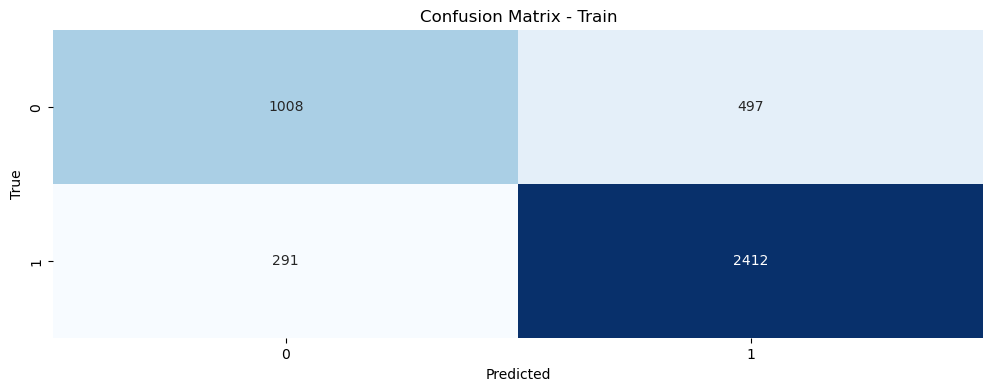

In [177]:
show_metrics(targets_list, np.round(predictions), mode="Train")
conf_matrix_train = confusion_matrix(targets_list, np.round(predictions))
show_mat(conf_matrix_train, title="Confusion Matrix - Train")

From the classification report, we can see that the best model shows marginal improvement in accuracy over the initial model.

In [174]:
# evaluation (test set - best model)
best_model.eval()
predictions = []
targets_list = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = best_model(inputs)
        predictions.extend(outputs.numpy())
        targets_list.extend(targets.numpy())

test_mse = mean_squared_error(targets_list, predictions)
print(f'Test MSE: {test_mse}')

Test MSE: 0.13791513442993164



Test Accuracy: 0.7986322188449848
Test Confusion Matrix:
 [[286 151]
 [114 765]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.65      0.68       437
         1.0       0.84      0.87      0.85       879

    accuracy                           0.80      1316
   macro avg       0.78      0.76      0.77      1316
weighted avg       0.80      0.80      0.80      1316



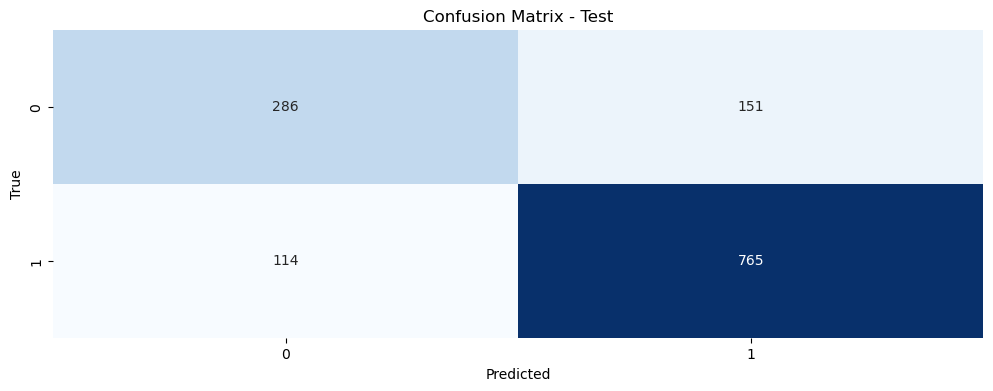

In [175]:
show_metrics(targets_list, np.round(predictions), mode="Test")
conf_matrix_test = confusion_matrix(targets_list, np.round(predictions))
show_mat(conf_matrix_test, title="Confusion Matrix - Test")

We can see from the report that the accuracy of the best model on the test set is around 79.86%, which is close to the results of the model on the training set (81.27%).

# Neural Network Conclusion

In conclusion, the created neural network with the best hyperparameters does a good job with new data, demonstrating its effectiveness in predicting the number of goals in the remaining playing time of soccer matches. The model underwent a comprehensive training process, incorporating hyperparameter tuning to enhance its performance. 

# Decision Tree Classifier

This time let's see how Random Forest will classify this.

In [44]:
# Instantiate Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X_train_1, y_train_1)

DecisionTreeClassifier(random_state=42)

Let's see how well it performs on validation set

In [45]:
# Make predictions on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

Validation Accuracy: 0.7004038964124495
Validation Confusion Matrix:
 [[ 912  581]
 [ 680 2036]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59      1493
           1       0.78      0.75      0.76      2716

    accuracy                           0.70      4209
   macro avg       0.68      0.68      0.68      4209
weighted avg       0.71      0.70      0.70      4209



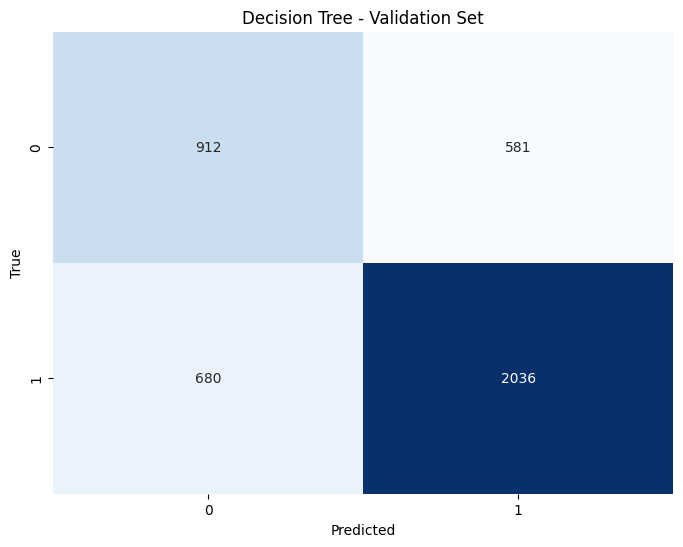

In [46]:
# Display evaluation metrics
print("Validation Accuracy:", accuracy)
print("Validation Confusion Matrix:\n", conf_matrix)
print("Validation Classification Report:\n", class_report)

# Visualize Confusion Matrix
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes)
axes.set_xlabel('Predicted')
axes.set_ylabel('True')
axes.set_title('Decision Tree - Validation Set')
plt.show()

With an accuracy of ~70%, an f1 score of 0.59 for class 0 given the number of misclassifications to class 0 when it should have been class 1.
Misclassifying class 0 is less prevalent but it is still sizeable. Initial model is not the best.

In [49]:
# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

Test Accuracy: 0.7226443768996961
Test Confusion Matrix:
 [[290 147]
 [218 661]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.66      0.61       437
           1       0.82      0.75      0.78       879

    accuracy                           0.72      1316
   macro avg       0.69      0.71      0.70      1316
weighted avg       0.74      0.72      0.73      1316



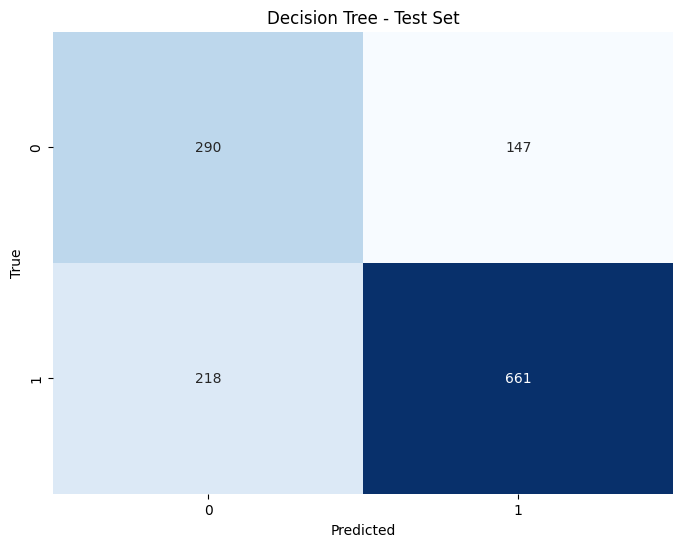

In [48]:
# Display evaluation metrics for the test set
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

# Visualize Confusion Matrix for the test set
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes)
axes.set_xlabel('Predicted')
axes.set_ylabel('True')
axes.set_title('Decision Tree - Test Set')
plt.show()

Similar story in test set. There must be something that causes it to fit more to class 0.

Let's try to make the model better. We will use the Validation set  to train it since we already used the training data. using randomized search to save time

In [53]:
from scipy.stats import randint

d_hpg = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [54]:
r_dtc = RandomizedSearchCV(decision_tree,d_hpg,scoring = 'f1', n_jobs = -1,refit = True,random_state =42)

In [55]:
r_dtc.fit(X_val,y_val)

C:\Users\shawn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shawn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shawn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\shawn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BC680AD0D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BC67982010>,
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1')

In [56]:
r_dtc.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=15,
                       min_samples_split=16, random_state=42,
                       splitter='random')

Okay, those are the hyperparameters we got. let's see if the training went well first. let's evaluate on validation set


Train Accuracy: 0.8063673081492041
Train Confusion Matrix:
 [[ 913  580]
 [ 235 2481]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.61      0.69      1493
           1       0.81      0.91      0.86      2716

    accuracy                           0.81      4209
   macro avg       0.80      0.76      0.78      4209
weighted avg       0.81      0.81      0.80      4209



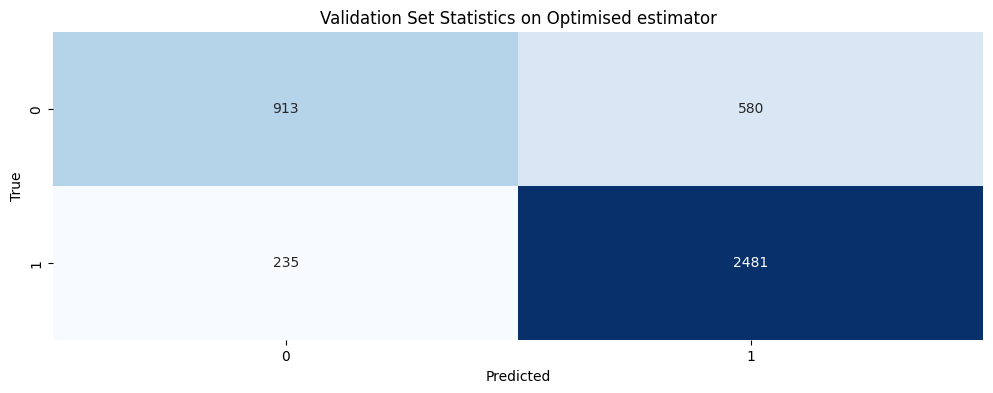

In [59]:
p_val = r_dtc.predict(X_val)
metrics = show_metrics(y_val,p_val, 'Train')
show_mat(metrics[1], "Validation Set Statistics on Optimised estimator")

Doing better. accuracy is now ~80%. F1 score for class 1 and class 0 also improved but for some reason, it still likes to misclassify 1 as a 0 sometimes. Not as often as before atleast

Let's take do the real test.


Test Accuracy: 0.7849544072948328
Test Confusion Matrix:
 [[250 187]
 [ 96 783]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.64       437
           1       0.81      0.89      0.85       879

    accuracy                           0.78      1316
   macro avg       0.76      0.73      0.74      1316
weighted avg       0.78      0.78      0.78      1316



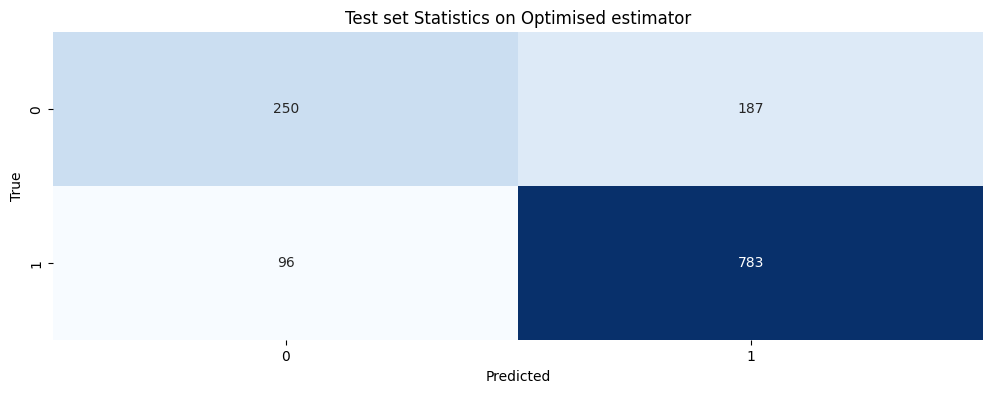

In [61]:
p_val = r_dtc.predict(X_test)
metrics = show_metrics(y_test,p_val, 'Test')
show_mat(metrics[1], "Test set Statistics on Optimised estimator")

Marginally more accurate(~72% for unoptimised, ~78% optimised). same goes for F1 score on both classes.

#  Decision TreeConclusion
The final accuracy is not great. the F1 also marginally improved. It seems there is a query that confuses class 1's as class 0's. That means there is may be overlap on the data set and it is confusing the model. Or maybe the query is just not that good.

# Final Conclusion

Decision tree performed the worst. It probably had a hard time since there may be a lot of overlaps on the data like in the current_minute.
Or that the model just cannot generalize the data well. This would probably explain why it was the worst performing model. 
Second place was Logistic regression.  It worked well for classifying and it can generalize the data better, but it was only marginally better. This might be because it is more flexible on how it handles its features. It assigns weights based on how important it thinks the feature is instead of just dividing the set based on a value for that feature.
Neural Networks performed better. Makes sense. It is a bit like logistic regression since it  assigns weights based on importance but the amount of computation it did is probably the one that gave it the highest accuracy.